## 3 persone saldo maggiore

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandasql import sqldf
def pysqldf(q): return sqldf(q, globals())


s1 = pd.read_csv("movimenti.csv", sep=";")
s1.groupby(["cognome","nome"]).sum(["importo"]).sort_values("importo",ascending=False).head(3)

,,importo
cognome,nome,
Hunziker,Michelle,964038
Cracco,Carlo,596540
Mauro,Massimo,543466


## 3 persone saldo minore


In [2]:
s1.groupby(["cognome","nome"]).sum(["importo"]).sort_values("importo",ascending=True).head(3)

,,importo
cognome,nome,
Frassica,Nino,-1510579
Forest,Mago,-1461235
Pappagone,Gaetano,-1020620


## Importo movimentato totale movimentato per ciascun anno

In [3]:
year = pd.DatetimeIndex(s1["data"]).year
s1.groupby(year).sum("importo")

,importo
data,
2000,-566590
2001,-777694
2002,-2309291
2003,-3797983
2004,-369603
2005,-700867
2006,-747417
2007,-1770298
2008,-1016101


## Elencare le operazioni al di sopra di 50000€

In [4]:
s1[s1["importo"]>50000]

,cognome,nome,data,importo
2087,Cracco,Carlo,2000/02/04 17:05:58,92937
3135,Hunziker,Michelle,2000/02/26 01:06:28,452022
3529,Hunziker,Michelle,2000/03/04 00:27:51,55290
8893,Hunziker,Michelle,2000/06/11 01:57:46,53240
38918,Hunziker,Michelle,2001/12/27 04:16:00,55231
39160,Hunziker,Michelle,2001/12/31 01:07:49,69879


## Operazioni sospette

In [5]:
importoMaggiore = pd.DataFrame(s1.groupby(["cognome", "nome"]).sum(["importo"]).sort_values(
    "importo", ascending=False).head(1)).reset_index() [["cognome","nome"]]

transazioniImportoMaggiore = s1[(s1["cognome"] == importoMaggiore["cognome"].item()) & (
    s1["nome"] == importoMaggiore["nome"].item())]

mediaImporto = transazioniImportoMaggiore.groupby(["nome","cognome"]).mean(["importo"])

importoMedio = mediaImporto.head().reset_index()["importo"].items()

# transazioniSospette = transazioniImportoMaggiore[transazioniImportoMaggiore["importo"].item() > importoMedio]

# transazioniSospette



# Dati pagina
## Riordinare i dati

In [6]:

s2 = pd.read_html("https://it.wikipedia.org/wiki/Comuni_d%27Italia_per_popolazione")[0].rename(
    columns={"Comune": "Comune", "Regione": "Regione", "Provincia / Città metropolitana": "Provincia", "Abitanti": "Abitanti"})
s2["Abitanti"] = s2["Abitanti"].str.replace("\s+","").astype("int");

pysqldf("select Regione,Provincia,Provincia,Abitanti from s2")





C:\Users\Spiro\AppData\Local\Temp\ipykernel_5380\3455445442.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  s2["Abitanti"] = s2["Abitanti"].str.replace("\s+","").astype("int");


,Regione,Provincia,Provincia,Abitanti
0,Lazio,Roma,Roma,2757870
1,Lombardia,Milano,Milano,1373410
2,Campania,Napoli,Napoli,909048
3,Piemonte,Torino,Torino,844056
4,Sicilia,Palermo,Palermo,626320
...,...,...,...,...
135,Sicilia,Trapani,Trapani,50044
136,Toscana,Firenze,Firenze,49841
137,Campania,Napoli,Napoli,49813
138,Campania,Caserta,Caserta,49784


## Mostrare il numero di comuni per ciascuna regione e odinarle in ordine alfabetico

In [7]:
pysqldf("select Regione,count(Comune) from s2 group by Regione order by Regione")


,Regione,count(Comune)
0,Abruzzo,4
1,Basilicata,2
2,Calabria,6
3,Campania,18
4,Emilia-Romagna,13
5,Friuli-Venezia Giulia,3
6,Lazio,11
7,Liguria,4
8,Lombardia,14
9,Marche,3


## Mostrare il numero di comuni per ciascuna regione e odinarle per numero di comuni

In [8]:
pysqldf("select Regione,count(Comune) as numero_comuni from s2 group by Regione order by numero_comuni desc")


,Regione,numero_comuni
0,Campania,18
1,Sicilia,15
2,Puglia,14
3,Lombardia,14
4,Toscana,13
5,Emilia-Romagna,13
6,Lazio,11
7,Piemonte,6
8,Calabria,6
9,Veneto,5


## Mostrare il numero di comuni per ciascuna regione e provincia

In [9]:
pysqldf("select Regione,Provincia,count(Comune) as numero_comuni from s2 group by Regione, Provincia order by numero_comuni desc")


,Regione,Provincia,numero_comuni
0,Campania,Napoli,11
1,Lazio,Roma,8
2,Lombardia,Milano,4
3,Puglia,Bari,4
4,Puglia,Barletta-Andria-Trani,4
...,...,...,...
79,Veneto,Padova,1
80,Veneto,Treviso,1
81,Veneto,Venezia,1
82,Veneto,Verona,1


# Mostrare il numero di abitanti per ciascuna regione

In [10]:
pysqldf("select Regione, sum(Abitanti) as NumeroAbitanti from s2 group by Regione order by NumeroAbitanti desc")


,Regione,NumeroAbitanti
0,Lazio,3467666
1,Lombardia,2529393
2,Campania,2062077
3,Sicilia,1919624
4,Emilia-Romagna,1895708
5,Toscana,1456748
6,Puglia,1415576
7,Piemonte,1222159
8,Veneto,914472
9,Liguria,762571


## Disegnare un grafico con il numero di comuni di ciascuna regione

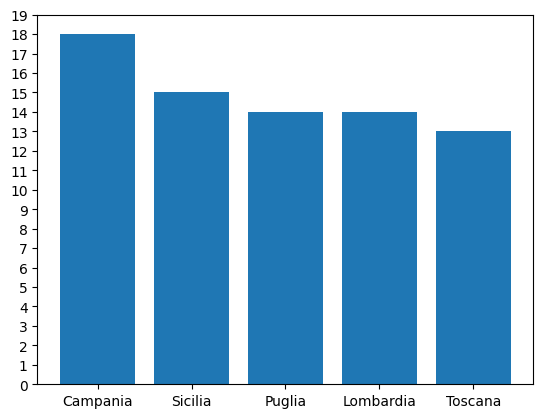

In [11]:
res = pysqldf("select Regione, count(Comune) as numeroComuni from s2 group by Regione order by numeroComuni desc limit 5")
plt.bar(res["Regione"],res["numeroComuni"])
plt.yticks(range(20))
plt.show()


## Disegnare un grafico con il numero di comuni di ciascuna regione

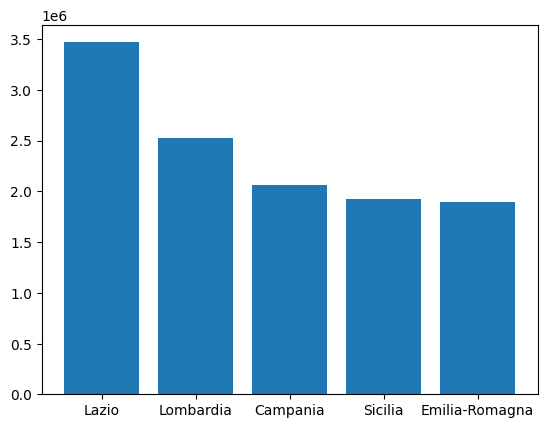

In [12]:

res = pysqldf("select Regione, sum(Abitanti) as NumeroAbitanti from s2 group by Regione order by NumeroAbitanti desc limit 5")
plt.bar(res["Regione"], res["NumeroAbitanti"])
plt.yticks()
plt.show()


# Analizzare i dati degli studenti raccolti la prima lezione

## Contare maschi e femmine per ciascun corso e sul totale dei dati raccolti

In [13]:
s3 = pd.read_csv(
    "_raccolta_dati_studenti_big_data_qzer - RaccoltaDatiV1 (2).csv", skiprows=[0])
s3["Data"] = pd.to_datetime(s3["Data"], format="%d/%m/%Y", errors="coerce")
s3["Altezza"] = pd.to_numeric(s3["Altezza"],errors="coerce")

pysqldf("select Sesso, count() as numero from s3 group by Sesso")

,Sesso,numero
0,None,4
1,?,1
2,F,3
3,M,16
4,NB,1
5,R,1
6,f,1
7,👑,1


## Contare studenti raggruppati per anno di nascita 

In [14]:
pysqldf("select  strftime('%Y', Data) as Anno, count()  from s3 group by Anno")



,Anno,count()
0,None,9
1,1993,1
2,1994,2
3,1997,1
4,1998,2
5,1999,1
6,2000,3
7,2001,6
8,2002,3


## Contare gli studenti per ciascun segno zodiacale

In [15]:
pysqldf("select [Segno zodiacale], count() from s3 group by [Segno zodiacale]")


,Segno zodiacale,count()
0,None,4
1,Ariete,1
2,Bilancia,1
3,Cancro,2
4,Capricorno,4
5,Gemelli,2
6,Lasciato,1
7,Leone,1
8,Leone (dentro),1
9,Pesci,2


## Calcolare altezza media degli studenti

In [16]:
pysqldf("select avg(Altezza) from s3")

,avg(Altezza)
0,183.791667


## Contare il numero medio di social utilizzati dagli studenti

In [34]:
twitter = pysqldf("select count() as number from s3 where UPPER(twitter) LIKE 'S%' ")



0    10
Name: number, dtype: int64